#### Import necessary library

In [59]:
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import GRU
from tensorflow.keras import layers
from keras.preprocessing import sequence
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [60]:
train_dir = 'C:\\Users\\alan\\AI Project\\dataset\\aclImdb\\train'
val_dir = 'C:\\Users\\alan\\AI Project\\dataset\\aclImdb\\test'

batch_size = 32

raw_train_ds = keras.utils.text_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    class_names=['neg', 'pos'])

raw_val_ds = keras.utils.text_dataset_from_directory(
    val_dir,
    batch_size=batch_size,
    class_names=['neg', 'pos'])

Found 25000 files belonging to 2 classes.
Found 25000 files belonging to 2 classes.


### Manually split the data into text and label

In [61]:
# Get X_train and y_train
X_train, y_train = [], []
for text_batch, label_batch in raw_train_ds:
    for text, label in zip(text_batch.numpy(), label_batch.numpy()):
        X_train.append(text.decode("utf-8"))
        y_train.append(label)
X_train = np.array(X_train)
y_train = np.array(y_train)

In [62]:
# Get X_val and y_val
X_val, y_val = [], []
for text_batch, label_batch in raw_val_ds:
    for text, label in zip(text_batch.numpy(), label_batch.numpy()):
        X_val.append(text.decode("utf-8"))
        y_val.append(label)
X_val = np.array(X_val)
y_val = np.array(y_val)

### Tokenization and encoding

In [63]:
max_review_length = 6000
vocab_size = 10000 

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

### Apply pad_sequences

In [64]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

# Padding
X_train_padded = pad_sequences(X_train_seq, maxlen=max_review_length)
X_val_padded = pad_sequences(X_val_seq, maxlen=max_review_length)

### Create model

In [65]:
# Define LSTM model architecture
embedding_dim = 128  

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_review_length),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

In [66]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [67]:
# Train the model
history = model.fit(X_train_padded, y_train, validation_data=(X_val_padded, y_val), epochs=8, batch_size=32)

Epoch 1/8
782/782 [==============================] - 726s 926ms/step - loss: 0.4257 - accuracy: 0.8067 - val_loss: 0.3481 - val_accuracy: 0.8608
Epoch 2/8
782/782 [==============================] - 636s 813ms/step - loss: 0.2794 - accuracy: 0.8910 - val_loss: 0.3182 - val_accuracy: 0.8714
Epoch 3/8
782/782 [==============================] - 604s 772ms/step - loss: 0.3634 - accuracy: 0.8329 - val_loss: 0.4358 - val_accuracy: 0.8286
Epoch 4/8
782/782 [==============================] - 569s 728ms/step - loss: 0.2264 - accuracy: 0.9123 - val_loss: 0.3350 - val_accuracy: 0.8688
Epoch 5/8
782/782 [==============================] - 576s 737ms/step - loss: 0.1469 - accuracy: 0.9472 - val_loss: 0.3822 - val_accuracy: 0.8590
Epoch 6/8
782/782 [==============================] - 583s 745ms/step - loss: 0.1215 - accuracy: 0.9571 - val_loss: 0.4624 - val_accuracy: 0.8015
Epoch 7/8
782/782 [==============================] - 580s 741ms/step - loss: 0.0939 - accuracy: 0.9669 - val_loss: 0.4442 - val_ac

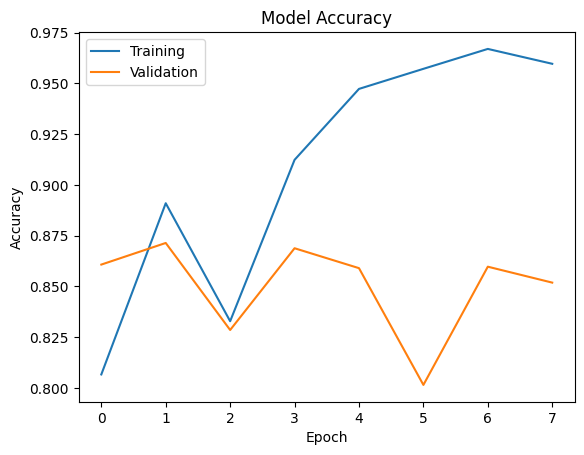

In [74]:
# Plot accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

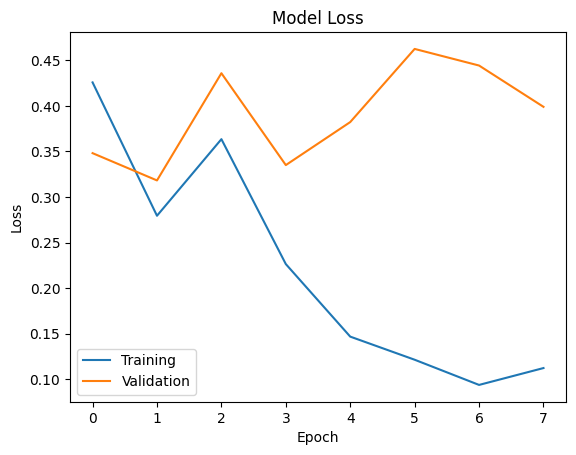

In [75]:
plt.figure()
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

## Below are Void Code
- no matter how i change my parameter, my model's accuracy is hovering around 50%
- which means that the model is not learning from the data effectively and is performing at the level of random guessing.
- I think it is due to data being mislabel


### After manully label the Data, the accuracy of the model are finally going up

In [ ]:
# # Define vectorization parameters
# max_features = 20000
# sequence_length = 600
# # Create TextVectorization layer
# vectorize_layer = TextVectorization(
#     max_tokens=max_features,
#     output_mode='int',
#     output_sequence_length=sequence_length)

In [ ]:
# Define a function to apply the text vectorization layer to the data
# def vectorize_text(text, label):
#     text = tf.expand_dims(text, -1)
#     return vectorize_layer(text), label

In [ ]:
# Apply the text vectorization layer to the training and validation data
# train_ds = raw_train_ds.map(vectorize_text)
# val_ds = raw_val_ds.map(vectorize_text)

In [ ]:
# create the model
# model = Sequential()
# model.add(Embedding(input_dim=max_features, output_dim=128))
# model.add(Dropout(0.5))  # Added Dropout layer after Embedding
# model.add(SimpleRNN(64, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dropout(0.5))  # Added Dropout layer after SimpleRNN
# model.add(Dense(1, activation='sigmoid'))
# # Compile the model
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# model = Sequential()
# model.add(Embedding(input_dim=20000, output_dim=16))
# model.add(Dropout(0.5))  # Added Dropout layer after Embedding
# model.add(SimpleRNN(64, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dropout(0.5))  # Added Dropout layer after SimpleRNN
# model.add(Dense(1, activation='sigmoid'))
# model = tf.keras.Sequential([
#     layers.Embedding(input_dim=20000, output_dim=16),
#     SimpleRNN(128),
#     layers.Dense(1, activation='sigmoid')
# ])
# model = tf.keras.Sequential([
#     layers.Embedding(input_dim=10000, output_dim=64),
#     layers.GRU(64),
#     layers.Dense(1, activation='sigmoid')
# ])
# Compile the model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# train_history = model.fit(X_train, y_train, batch_size=32,
#                           epochs=10, verbose=2,
#                           validation_split=0.2)